In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import graphviz as gv


In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('target',axis=1),data['target'],test_size=0.2,random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


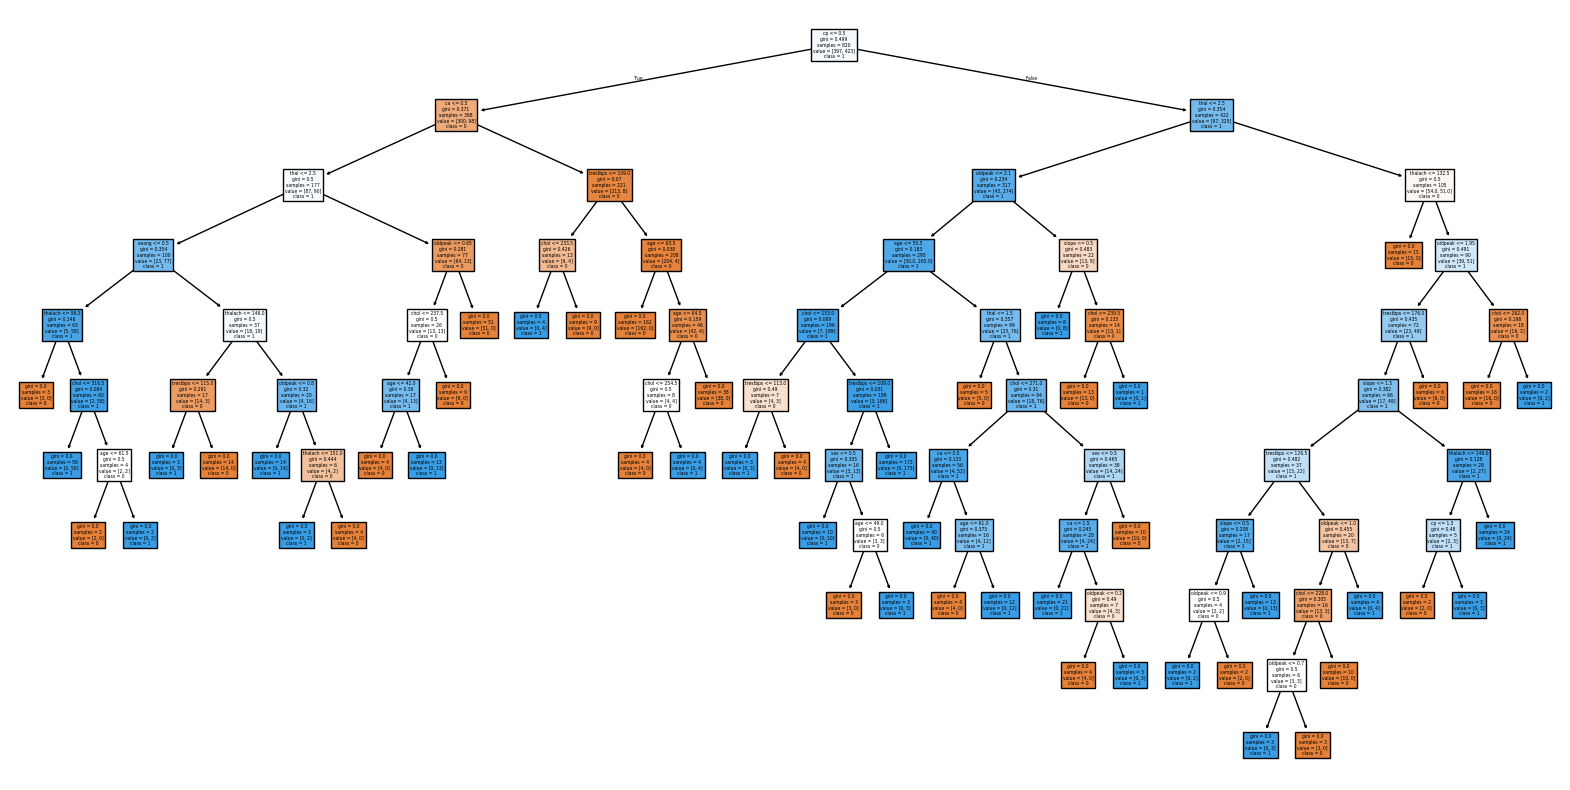

In [7]:
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in classifier.classes_])
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
train_acc = accuracy_score(y_train, classifier.predict(X_train))
test_acc = accuracy_score(y_test, classifier.predict(X_test))
print(f"Training Accuracy:{train_acc}")
print(f"Testing Accuracy:{test_acc}")

Training Accuracy:1.0
Testing Accuracy:0.9853658536585366


In [10]:
classifier_new=DecisionTreeClassifier(max_depth=4,min_samples_split=10,min_samples_leaf=5, random_state=0)
classifier_new.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


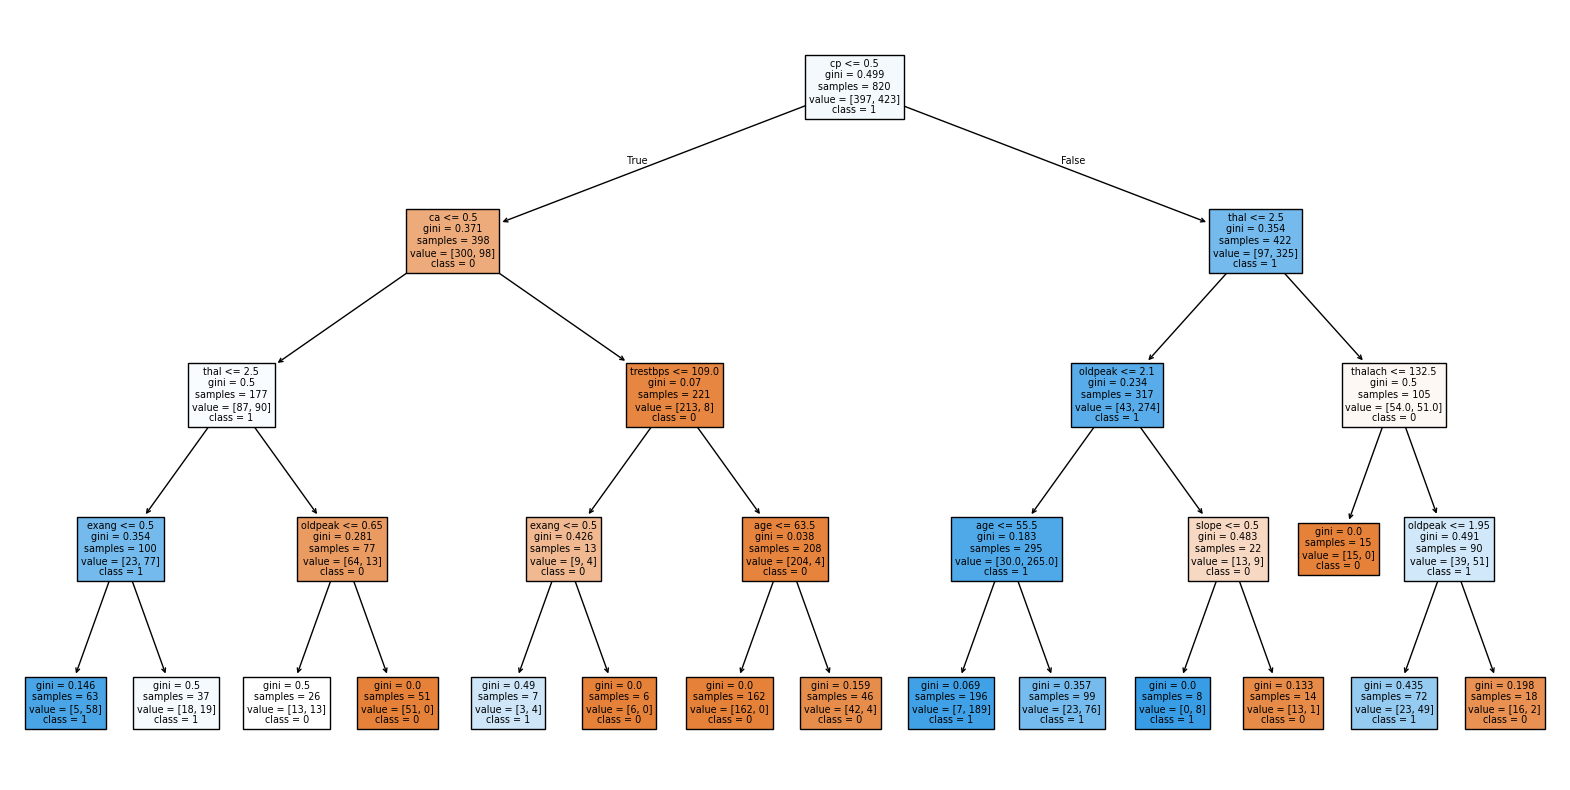

In [11]:
plt.figure(figsize=(20,10))
plot_tree(classifier_new, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in classifier_new.classes_])
plt.show()  

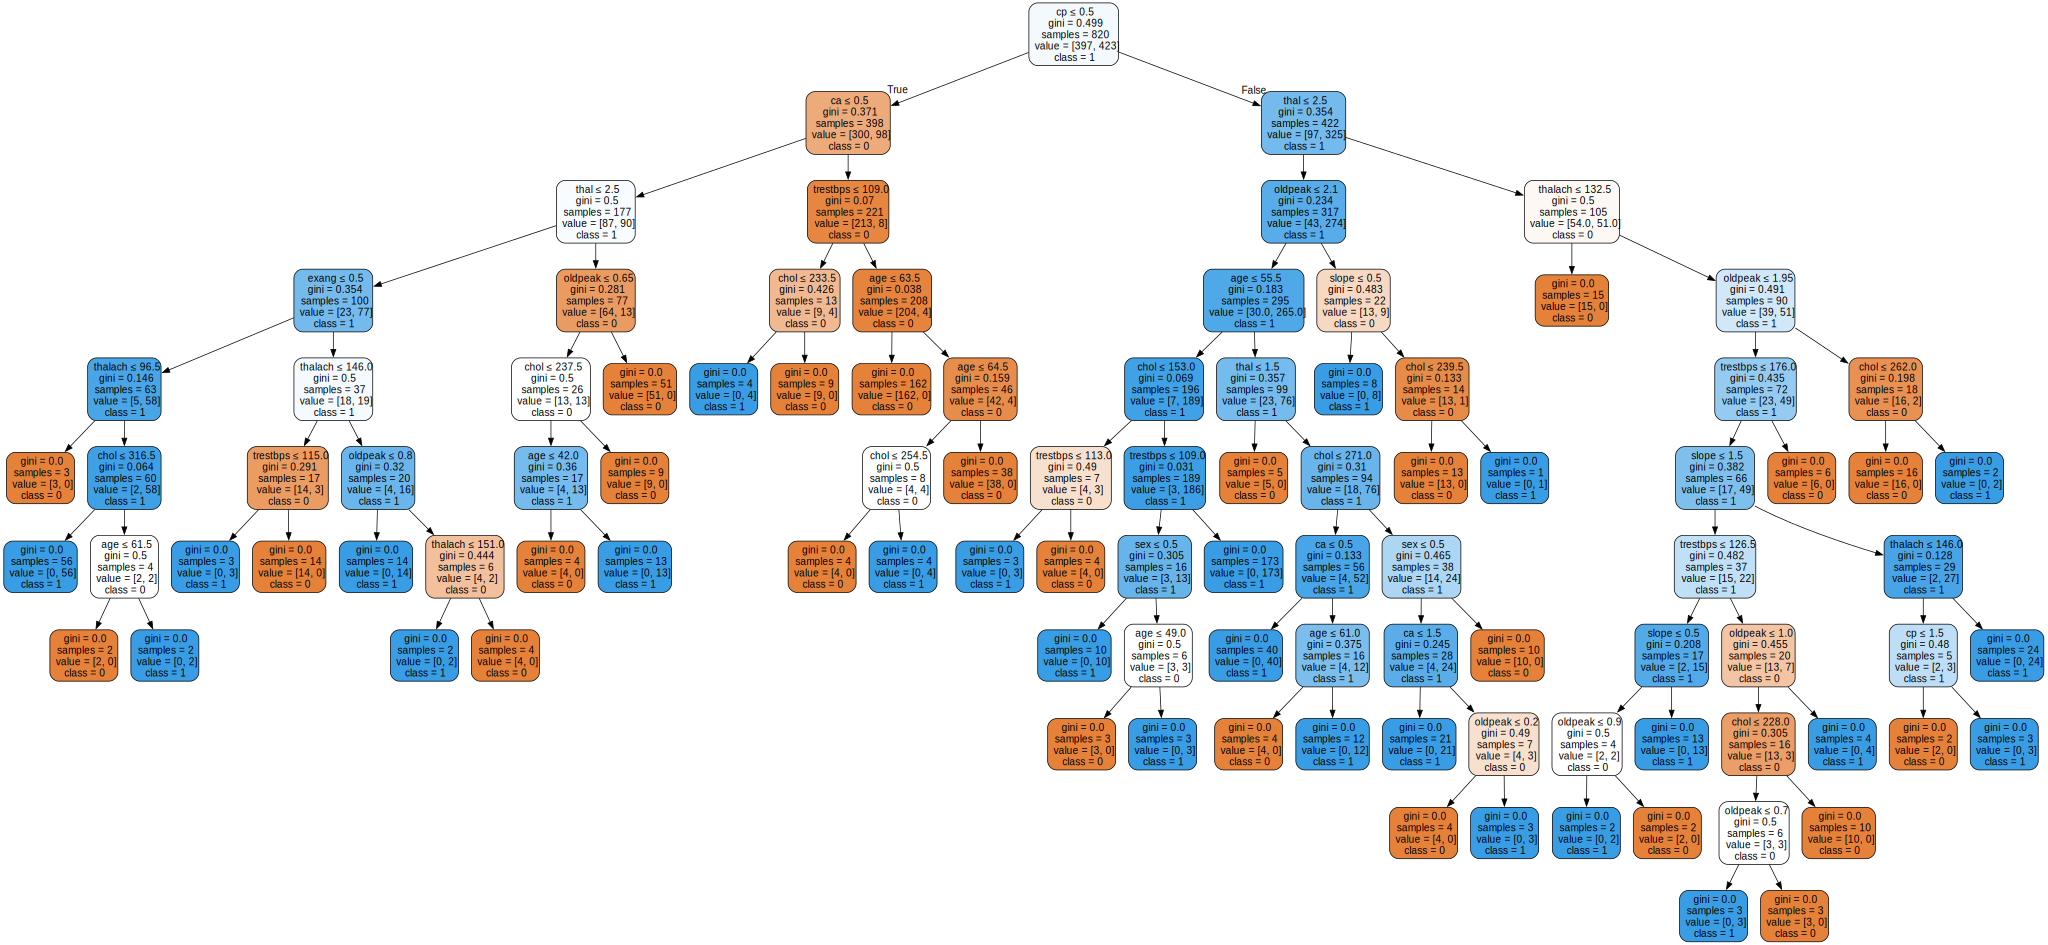

In [12]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(classifier,out_file="tree.dot",feature_names=X_train.columns,class_names=[str(c) for c in classifier.classes_],filled=True,rounded=True,special_characters=True)
Source.from_file("tree.dot")

In [13]:
train_acc_new=accuracy_score(y_train, classifier_new.predict(X_train))
test_acc_new=accuracy_score(y_test, classifier_new.predict(X_test))
print(f"New Training Accuracy:{train_acc_new}")
print(f"New Testing Accuracy:{test_acc_new}")

New Training Accuracy:0.8792682926829268
New Testing Accuracy:0.7951219512195122


In [14]:
for depth in range(1, 11):
    classifier_tune=DecisionTreeClassifier(max_depth=depth, random_state=0)
    classifier_tune.fit(X_train, y_train)
    print(f"Depth={depth} | Train={classifier_tune.score(X_train, y_train):.3f} | Test={classifier_tune.score(X_test, y_test):.3f}")

Depth=1 | Train=0.762 | Test=0.751
Depth=2 | Train=0.770 | Test=0.678
Depth=3 | Train=0.851 | Test=0.780
Depth=4 | Train=0.883 | Test=0.800
Depth=5 | Train=0.929 | Test=0.844
Depth=6 | Train=0.949 | Test=0.883
Depth=7 | Train=0.973 | Test=0.912
Depth=8 | Train=0.990 | Test=0.976
Depth=9 | Train=0.996 | Test=0.980
Depth=10 | Train=1.000 | Test=0.985


In [15]:
classifier_8=DecisionTreeClassifier(max_depth=8, random_state=0)
classifier_8.fit(X_train, y_train)
train_acc_8=accuracy_score(y_train, classifier_8.predict(X_train))
test_acc_8=accuracy_score(y_test, classifier_8.predict(X_test))
print(f"Depth=8 Training Accuracy:{train_acc_8}")
print(f"Depth=8 Testing Accuracy:{test_acc_8}")

Depth=8 Training Accuracy:0.9902439024390244
Depth=8 Testing Accuracy:0.975609756097561


In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=200,max_depth=8,random_state=0)
random_forest.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
train_acc_rf=accuracy_score(y_train, random_forest.predict(X_train))
test_acc_rf=accuracy_score(y_test, random_forest.predict(X_test))
print(f"Random Forest Training Accuracy:{train_acc_rf}")
print(f"Random Forest Testing Accuracy:{test_acc_rf}")

Random Forest Training Accuracy:0.9963414634146341
Random Forest Testing Accuracy:0.9804878048780488


In [18]:
print(f"Decision Tree->Train:{train_acc:.3f},Test:{test_acc:.3f}")
print(f"Random Forest-> Train:{train_acc_rf:.3f},Test:{test_acc_rf:.3f}")

Decision Tree->Train:1.000,Test:0.985
Random Forest-> Train:0.996,Test:0.980


In [19]:
importances=random_forest.feature_importances_
features=pd.Series(importances, index=X_train.columns)
features=features.sort_values(ascending=False)
print(features)

cp          0.141004
thal        0.133634
ca          0.131040
oldpeak     0.119968
thalach     0.109829
age         0.075768
chol        0.073098
trestbps    0.062568
exang       0.054976
slope       0.045037
sex         0.029408
restecg     0.015455
fbs         0.008214
dtype: float64


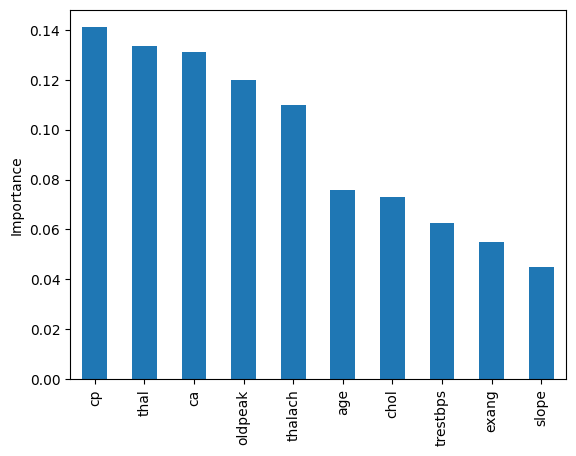

In [20]:
features.head(10).plot(kind='bar')
plt.ylabel("Importance")
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores=cross_val_score(random_forest,X_train,y_train,cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.99390244 0.95121951 1.         0.98780488 0.93902439]
Mean CV Accuracy: 0.974390243902439
